Plot Single-Scattering Properties
===========================

Go back to the [list of notebooks](../simple_usage.rst) if this is not what you are looking for

This notebook show how to use snowScatt to compute the single scattering properties of some particle properties

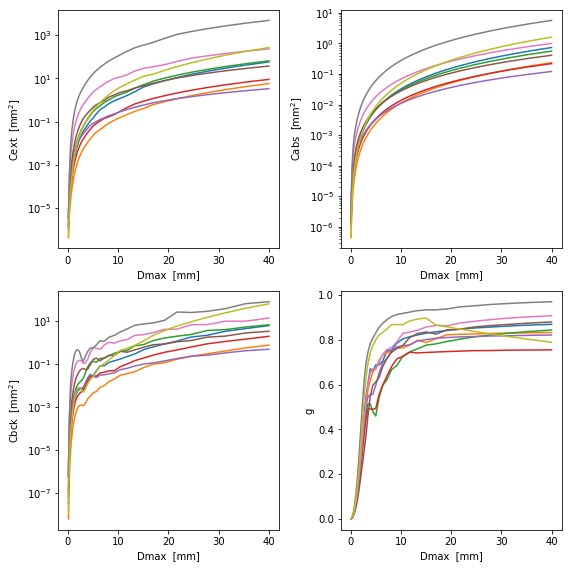

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
begin = datetime.datetime.now()

import snowScatt

particle_types = ["vonTerzi_plate",
                  "vonTerzi_dendrite",
                  "vonTerzi_column",
                  "vonTerzi_needle",
                  "vonTerzi_mixcoldend",
                  "Leinonen15tabB02",
                  "Leinonen15tabB05",
                  "Leinonen15tabB20",
                  "Ori_collColumns"]
particle_labels = ["CaE plate",
                   "CaE dendrite",
                   "CaE column",
                   "CaE needle",
                   "CaE mix",
                   "LS15 B02",
                   "LS15 B05",
                   "LS15 B20",
                   "Ori14 column"]

diameters   = np.logspace(-4,np.log10(4e-2))

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for i, particle in enumerate(particle_types):
    results = snowScatt.calcProperties(diameters=diameters,
                                       wavelength=3.19e-3, # W-band radar 94 GHz
                                       properties=particle,
                                       temperature=270, # compute refractive index internally from Iwabuchi 2010
                                      )
    Cext, Cabs, Csca, Cbck, asym, phase, mass_prop, vel, area = results
    axes[0, 0].plot(diameters*1.0e3, Cext*1.0e6, label=particle_labels[i])
    axes[0, 1].plot(diameters*1.0e3, Cabs*1.0e6, label=particle_labels[i])
    axes[1, 0].plot(diameters*1.0e3, Cbck*1.0e6, label=particle_labels[i])
    axes[1, 1].plot(diameters*1.0e3, asym, label=particle_labels[i])

axes[0, 0].set_yscale('log')
axes[0, 1].set_yscale('log')
axes[1, 0].set_yscale('log')

axes[0, 0].set_xlabel('Dmax  [mm]')
axes[0, 1].set_xlabel('Dmax  [mm]')
axes[1, 0].set_xlabel('Dmax  [mm]')
axes[1, 1].set_xlabel('Dmax  [mm]')

axes[0, 0].set_ylabel('Cext  [mm$^2$]')
axes[0, 1].set_ylabel('Cabs  [mm$^2$]')
axes[1, 0].set_ylabel('Cbck  [mm$^2$]')
axes[1, 1].set_ylabel('g')
fig.tight_layout()

Go back to the [list of notebooks](../simple_usage.rst) for some more snow studies